# Gage R&R

GAGE R&R is to be used for continuous data, or when data can be logically divided. 
This can include measurements, weights, volumes, or other non-discrete units of 
measure. GAGE R&R identifies issues with repeatability (the first R, or same opera
tor repeating a measurement) and reproducibility (the second R, or a different oper
ator measuring the same thing when it is a non- destructive test).

In [1]:
import pandas as pd
from pypetb import RnR
import numpy as np
from stats_tests import gagerr
import matplotlib.pyplot as plt
plt.style.use('classic')

In [2]:
# Replace with your actual Excel path/sheet
xls = pd.ExcelFile("Six Sigma_Case Study.xlsx")
df = (
    pd.read_excel(xls, 
                   sheet_name="GAGE R R",)
        .dropna(how="all")
)
df.columns = df.columns.str.strip()
df.head()

,Part,Assessor,Response
0,1,A,82.29
1,1,A,82.41
2,1,A,82.64
3,2,A,81.44
4,2,A,81.32


## Gage R&R study

### 1. Initializing and Solving Gage R&R Model ###

### 2. ANOVA Table ###
                       DF         SS        MS           F             P
Source of variability                                                   
Technician              2   3.167262  1.583631   79.406049  1.174478e-09
Part                    9  88.361934  9.817993  492.291423  1.110223e-16
TechxPart (iteration)  18   0.358982  0.019943    0.433721  9.741064e-01
Repeatability with     60   2.758933  0.045982         NaN           NaN
Repeatability without  78   3.117916  0.039973         NaN  9.741064e-01
Total                  89  94.647112       NaN         NaN           NaN

### 3. Gage R&R Variance Table ###
                           Variance  % Contribution
Source                                             
Total Gage R&R             0.091429        7.762159
Eq.Var. (Repeatability)    0.039973        3.393677
Op.Var. (Reproducibility)  0.051455        4.368482
Technician                 0.051455        4.

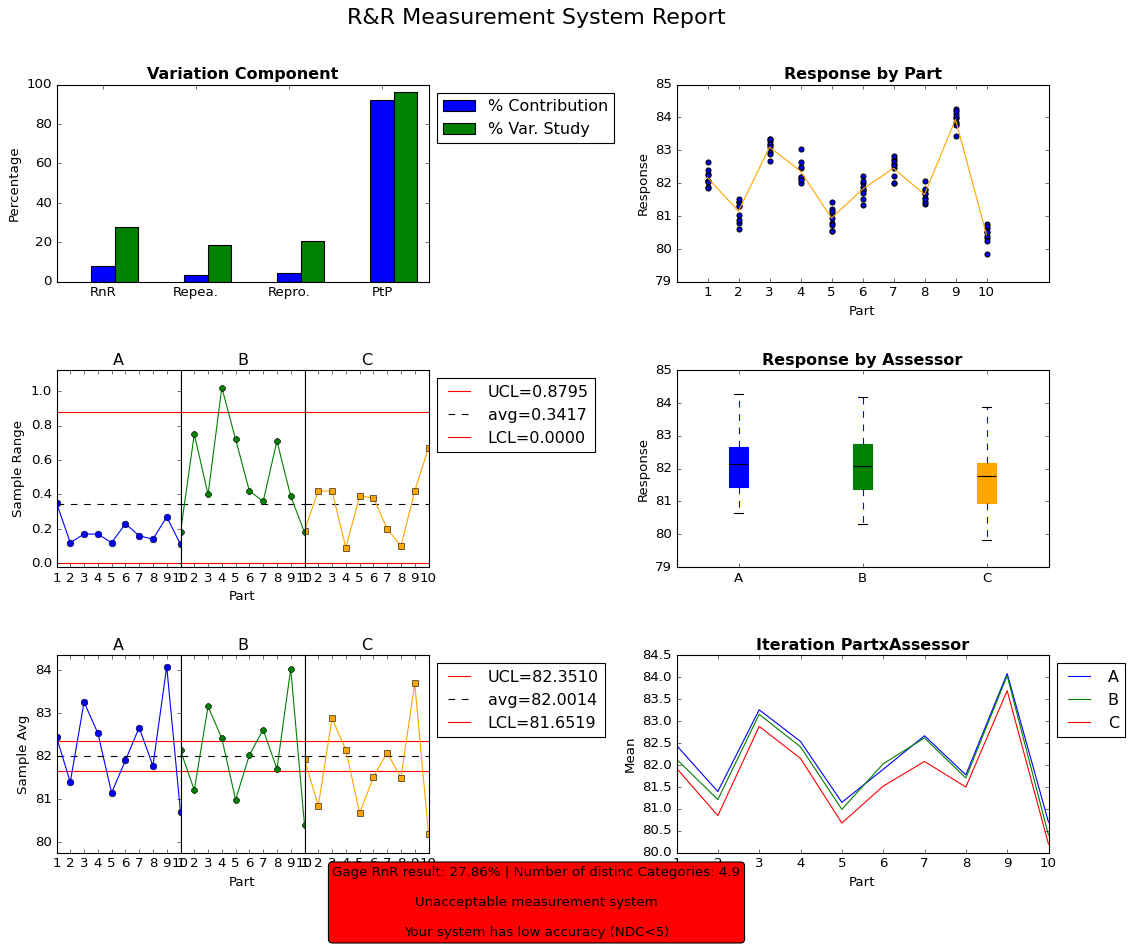


### 5. Standard Deviation Table ###
                           StdDev (SD)  StudyVar (6*SD)  % Study Var
Source                                                              
Total Gage R&R                0.302372         1.814229    27.860651
Eq.Var. (Repeatability)       0.199933         1.199599    18.421935
Op.Var. (Reproducibility)     0.226838         1.361025    20.900913
Technician                    0.226838         1.361025    20.900913
Technician x Part iter.       0.000000         0.000000     0.000000
Part to Part                  1.042327         6.253965    96.040534
Total variation               1.085300         6.511797   100.000000

### 6. Control Charts (X-bar and Range) ###


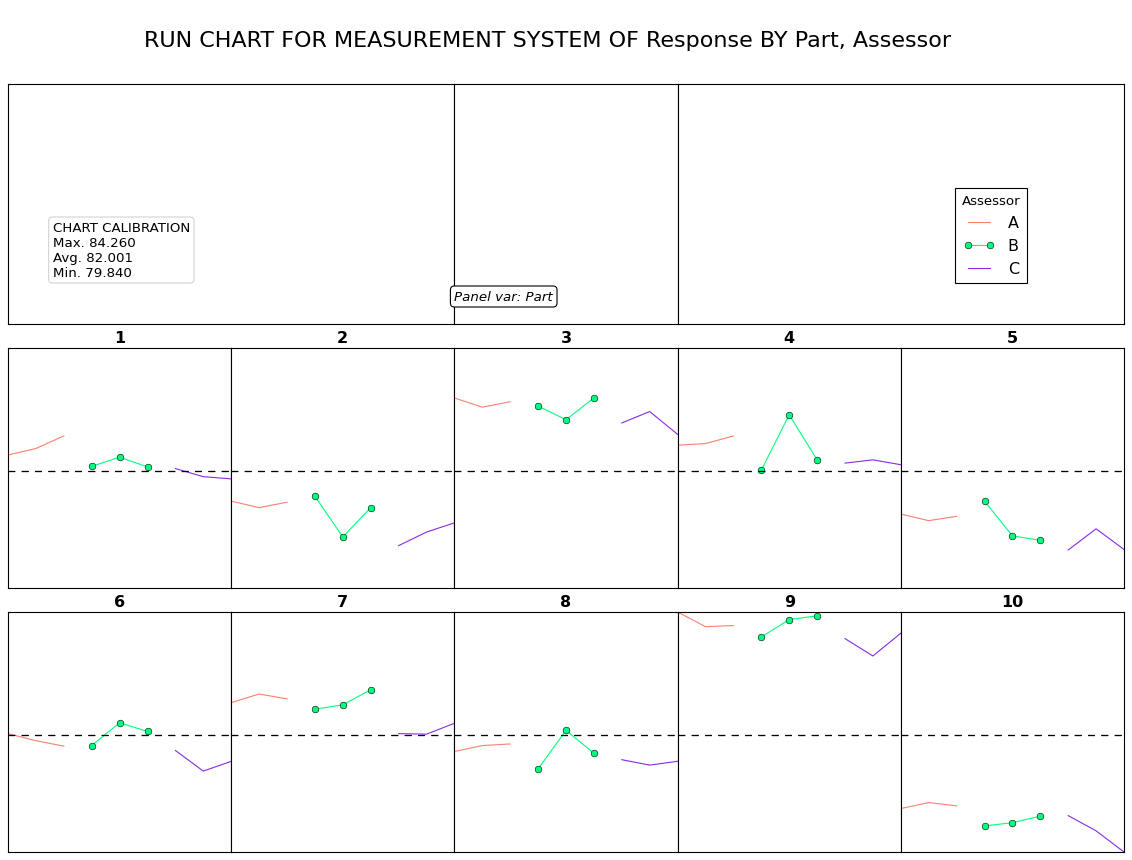

In [4]:
results = gagerr(df)

# Access results
anova_table = results['anova']
var_table = results['variance']
sd_table = results['sd_table']


## Summary

- Most variation is in parts versus the measurement system.
- There is no apparent interaction between people and parts.
- Overall repeatability and reproducibility is good.
- Some operator interaction noted.
- While the Gage suggests the test method for measuring brake caliper torsion is sufficient, note the number of distinct categories is less than 5.
- Further evaluation is required to increase the number of distinct categories and understand the operator effect.